# Chapter 10: Toward Sustainable AI
Figures and exercises for Chapter 10 of [Sustainable AI](https://www.oreilly.com/library/view/sustainable-ai/9781098155506/) by Raghavendra Selvan. 

**To run locally without errors, clone the entire repository:** 

``` git clone https://github.com/raghavian/sustainable_ai.git ```

### **Figure 10-1.** Historical trend of nitrous oxide levels measured in parts per billion (PBB). (Source: [Two Degrees Institute](https://2degreesinstitute.org).)

/tmp/ipykernel_44977/4287119749.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Date"] = pd.to_datetime(df["Date"], errors="coerce")


(1700.0, 2025.0)

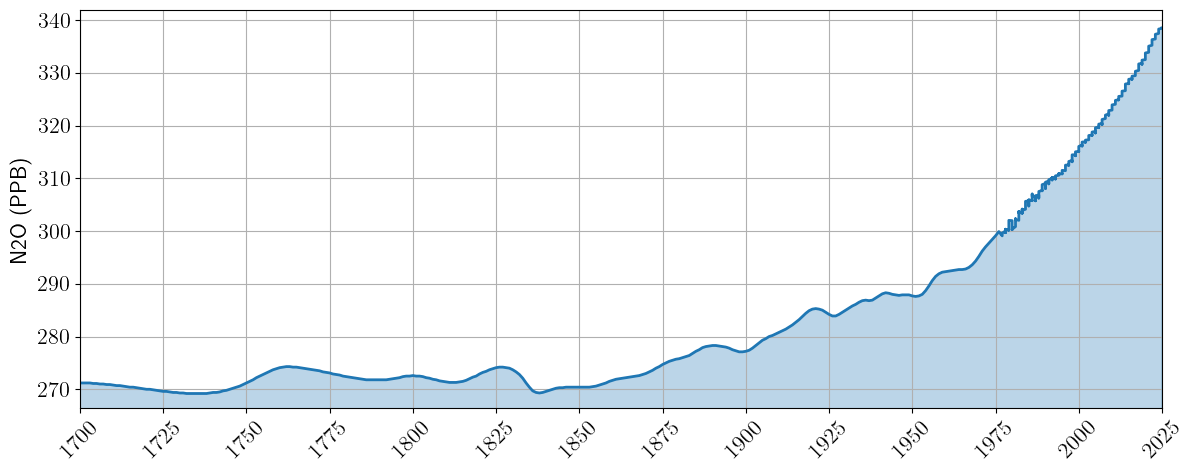

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

params = {'font.size': 16,
          'font.weight': 'normal',
          'axes.labelsize':16,
          'axes.titlesize':16,
          'axes.labelweight':'normal',
          'axes.titleweight':'normal',
          'legend.fontsize': 16,
          "text.usetex": True,
         }
matplotlib.rcParams.update(params)


# Read the file as plain text
file_path = "../data/ch10_two_degree_data_2025-06-30.csv" 
with open(file_path, "r") as f:
    lines = f.readlines()

# Extract lines with two columns separated by comma
data_lines = []
for line in lines:
    parts = line.strip().split(",")
    if len(parts) == 2:
        data_lines.append(parts)

# Build DataFrame
df = pd.DataFrame(data_lines, columns=["Date", "N2O_Value"])
df["Date"] = pd.to_datetime(df["Date"], errors="coerce")
df["N2O_Value"] = pd.to_numeric(df["N2O_Value"], errors="coerce")

# Keep data from year 1600 onward
df = df[df["Date"].dt.year >= 1600]
df["Year"] = df["Date"].dt.year

# Plot
plt.figure(figsize=(12, 5))
plt.plot(df["Year"], df["N2O_Value"], linewidth=2)
ymin = df["N2O_Value"].min()*0.99
ymax = df["N2O_Value"].max()*1.01

plt.fill_between(df['Year'], df['N2O_Value'], color='tab:blue', alpha=0.3)
plt.ylabel("N2O (PPB)")

# X-ticks every 25 years
start_year = 1700
end_year = df["Year"].max()
xticks = list(range(start_year, end_year + 1, 25))
plt.xticks(ticks=xticks, rotation=45)
plt.grid(True)
plt.ylim([ymin,ymax])
plt.tight_layout()
plt.xlim([start_year,end_year])

### **Figure 10-3.** Energy efficiency improvements for different hardware accelerators. (Source: data derived from Robi Rahman, “Leading ML Hardware Becomes 40% More Energy-Efficient Each Year,” [Epoch AI [blog]](https://oreil.ly/8SUpC).)

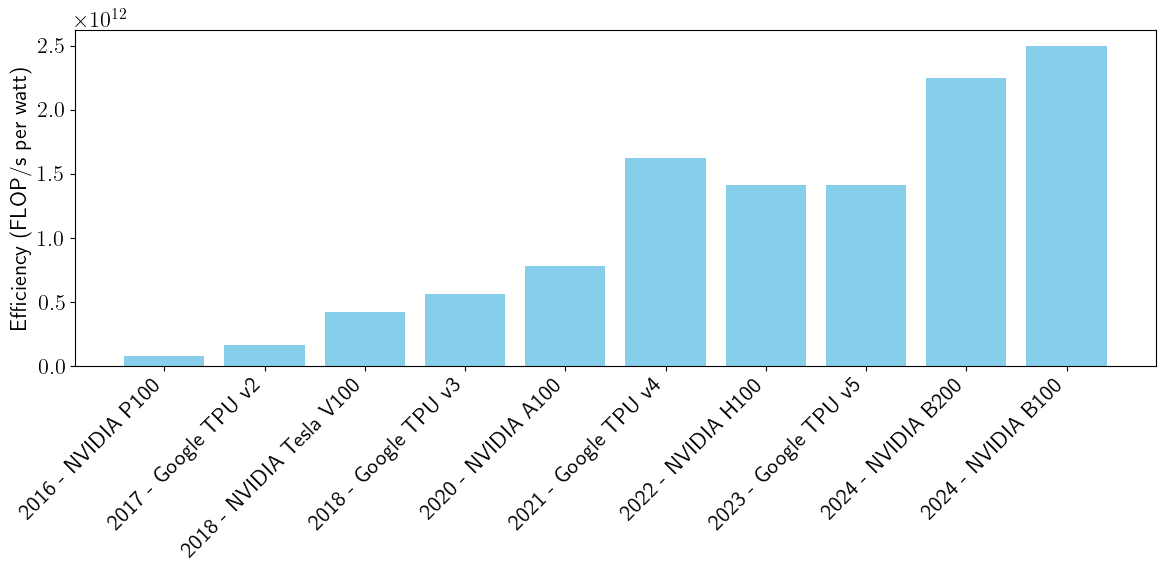

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib

params = {'font.size': 16,
          'font.weight': 'normal',
          'axes.labelsize':16,
          'axes.titlesize':16,
          'axes.labelweight':'normal',
          'axes.titleweight':'normal',
          'legend.fontsize': 16,
          "text.usetex": True,
         }
matplotlib.rcParams.update(params)

# Data
df = pd.read_csv('../data/ch10_hardware.csv')
df['label'] = df['year'].astype(str) + ' - ' + df['device']
df = df.sort_values('year')

# Plot
plt.figure(figsize=(12, 6))
bars = plt.bar(df['label'], df['efficiency'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Efficiency (FLOP/s per watt)')
plt.tight_layout()

### **Figure 10-5.** Investment in AI over time categorized into public and private contributions (top). Top 20 countries investing in AI (bottom). (Source: data from The [AI Index 2025 Annual Report](https://oreil.ly/-rLw8) by Stanford University.)

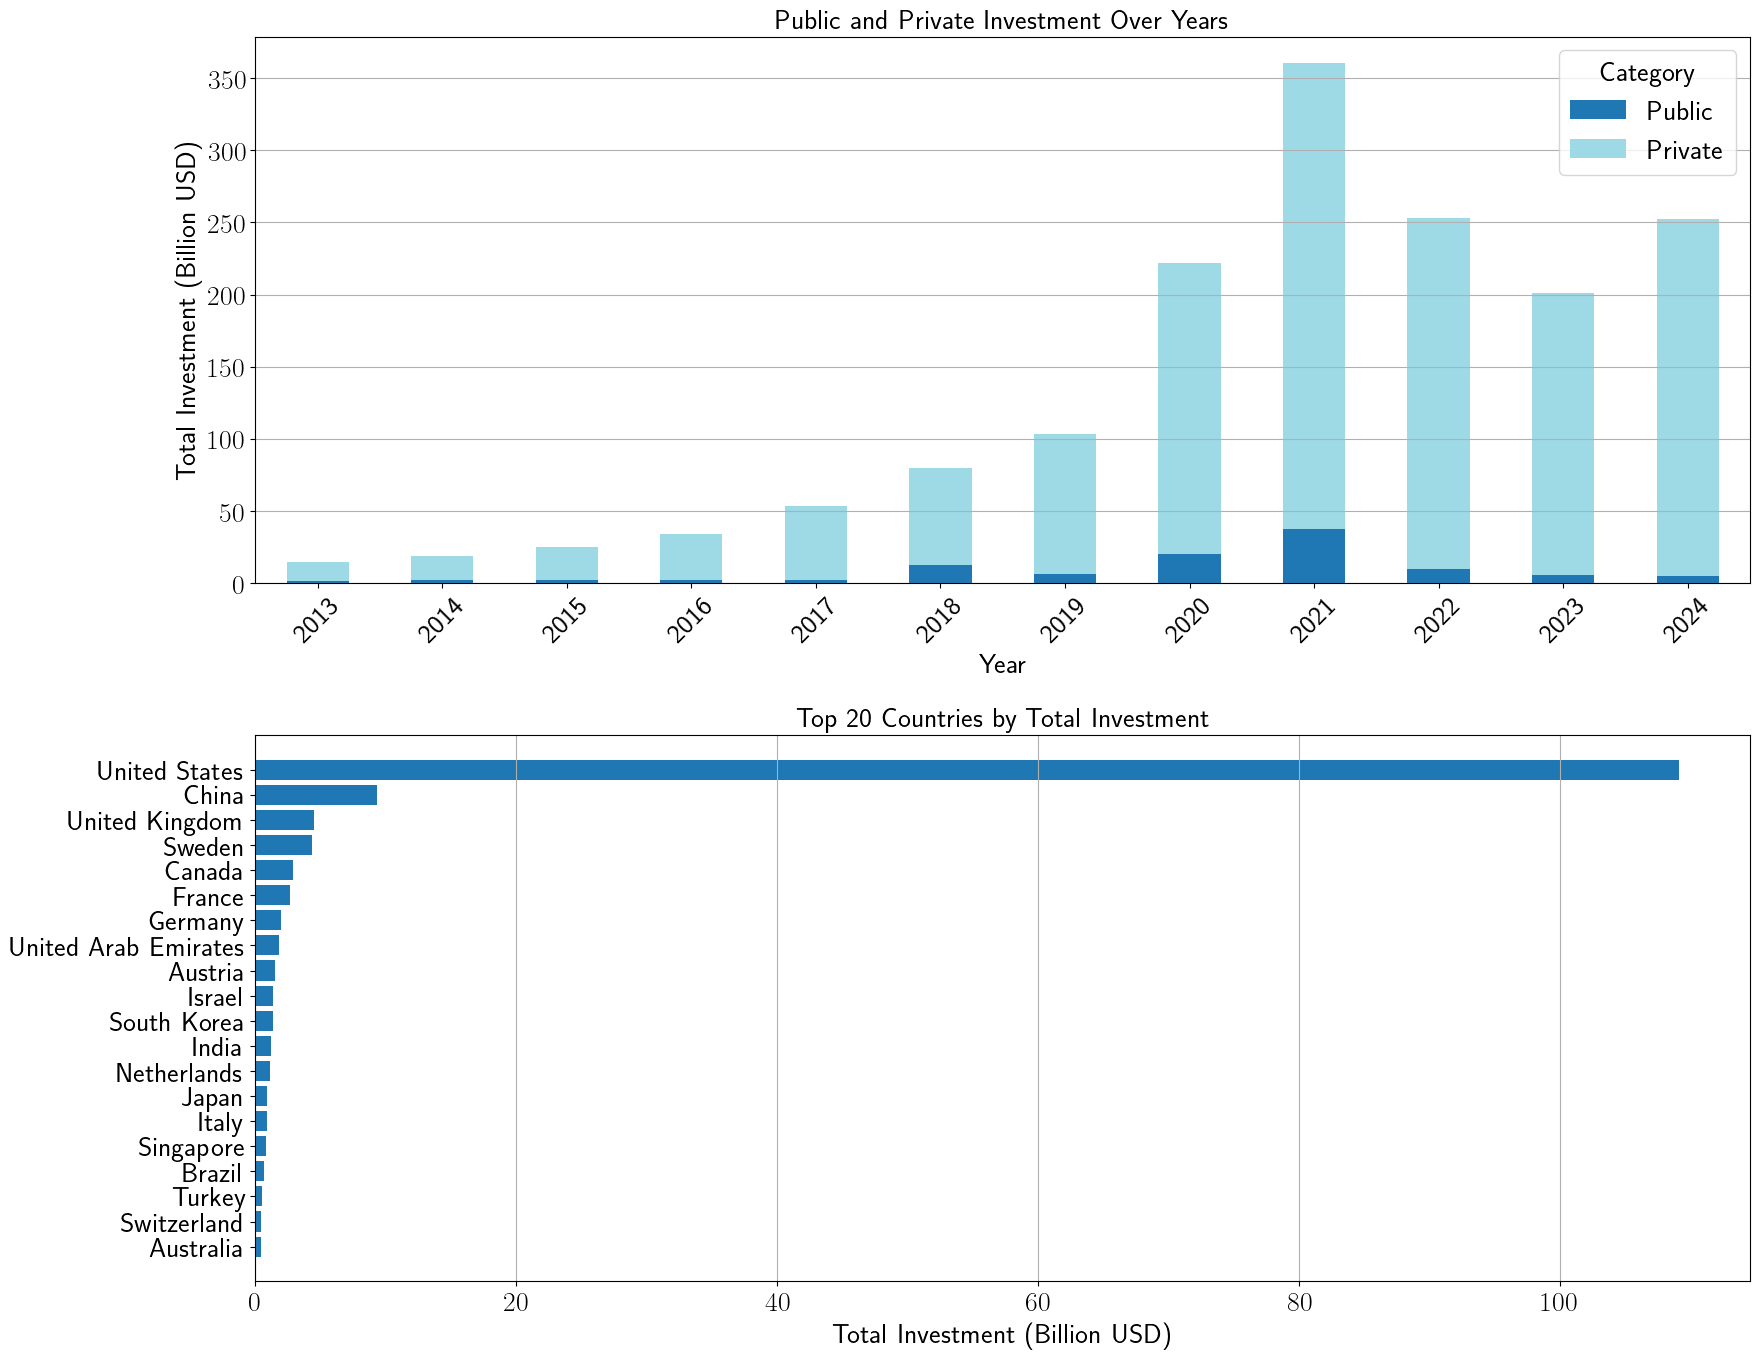

In [5]:
import matplotlib 
import pandas as pd
import matplotlib.pyplot as plt

params = {'font.size': 20,
          'font.weight': 'normal',
          'axes.labelsize':20,
          'axes.titlesize':20,
          'axes.labelweight':'normal',
          'axes.titleweight':'normal',
          'legend.fontsize': 20,
          "text.usetex": True,
         }
matplotlib.rcParams.update(params)

# Load the datasets
yearly_df = pd.read_csv("../data/ch10_corporate_investment.csv")
country_df = pd.read_csv("../data/ch10_investment_country.csv")

# Categorize investment types into 'Public' and 'Private'
def categorize_investment(investment_type):
    if investment_type in ['Private Investment', 'Minority Stake', 'Merger/Acquisition']:
        return 'Private'
    elif investment_type == 'Public Offering':
        return 'Public'
    else:
        return 'Other'

yearly_df['Category'] = yearly_df['Investment Type'].apply(categorize_investment)

# Group by Year and Category, then sum the investments
grouped = yearly_df.groupby(['Year', 'Category'])['Total investment (in billions of US dollars)'].sum().unstack(fill_value=0)

# Prepare top 20 countries
top_countries = country_df.sort_values(by='Total Investment (in Billions of U.S. Dollars)', ascending=False).head(20)

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(18, 14))

# Subplot 1: Stacked bar chart for Public and Private investments over years
grouped[['Public', 'Private']].plot(kind='bar', stacked=True, ax=axes[0],cmap='tab20')
axes[0].set_title('Public and Private Investment Over Years')
axes[0].set_ylabel('Total Investment (Billion USD)')
#axes[0].set_xlabel('Year')
axes[0].tick_params(axis='x', rotation=45)
axes[0].grid(axis='y')
axes[0].legend(title='Category')

# Subplot 2: Horizontal bar chart for top 20 countries
axes[1].barh(top_countries['Geographic area'], top_countries['Total Investment (in Billions of U.S. Dollars)'])
axes[1].set_title('Top 20 Countries by Total Investment')
axes[1].set_xlabel('Total Investment (Billion USD)')
axes[1].invert_yaxis()  # Largest at top
axes[1].grid(axis='x')

plt.tight_layout()

### Figure 10-6. Distribution of the number of supercomputers listed in Green500 by country based on data from November 2024. (Source: data from [Green500](https://oreil.ly/VPo96).)

#### Install plotly for visualization.

In [ ]:
### Install plotly
!pip install plotly

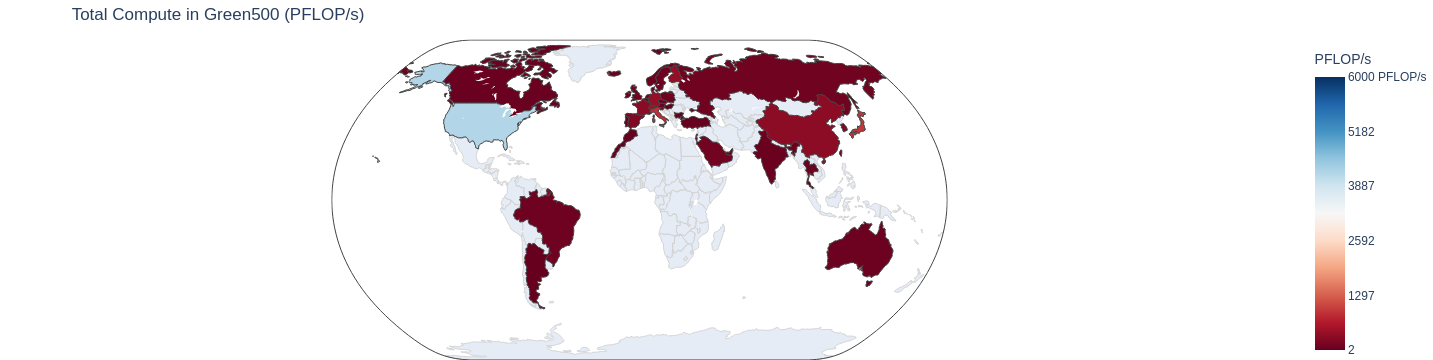

In [13]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load and prepare data exactly as you do
df = pd.read_excel('../data/ch10_TOP500_202411.xlsx')
df = df[['Country','Rmax [TFlop/s]']].copy()
df['Count'] = 1
df['Rmax [TFlop/s]'] /= 1000  # now PFLOP/s

# normalization of US naming
df.loc[df.Country == 'United States', 'Country'] = 'United States of America'

# Aggregate
df = df.groupby('Country', as_index=False).sum()

# Preserve your vmax-based tweak for the US
vmin = df['Rmax [TFlop/s]'].min()
vmax = df['Rmax [TFlop/s]'].max()
df.loc[df.Country == 'United States of America', 'Rmax [TFlop/s]'] = vmax * 0.65

# Plotly wants standard country names. Map a few common mismatches.
name_fix = {
    'United States of America': 'United States',
    'Russia': 'Russian Federation',
    'South Korea': 'Korea, Republic of',
    'North Korea': "Korea, Democratic People's Republic of",
    'Czechia': 'Czech Republic',
    'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    'Congo (Brazzaville)': 'Congo',
    'Taiwan': 'Taiwan',
    'Vietnam': 'Viet Nam',
    'Syria': 'Syrian Arab Republic',
    'Moldova': 'Moldova, Republic of',
    'Tanzania': 'Tanzania, United Republic of',
}
df['Country_plotly'] = df['Country'].replace(name_fix)

# Build colorbar ticks and labels, with the top relabeled
tickvals = np.linspace(vmin, vmax, 6)
ticktext = [f"{int(t)}" for t in tickvals[:-1]] + ['6000 PFLOP/s']

fig = px.choropleth(
    df,
    locations='Country_plotly',
    locationmode='country names',
    color='Rmax [TFlop/s]',
    hover_name='Country',
    color_continuous_scale='RdBu',  # close in spirit to matplotlib's coolwarm
    range_color=(vmin, vmax),
)

fig.update_layout(
    title='Total Compute in Green500 (PFLOP/s)',
    coloraxis_colorbar=dict(
        title='PFLOP/s',
        tickvals=tickvals,
        ticktext=ticktext
    ),
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.update_geos(
    projection_type='natural earth',
    showcountries=True,
    countrycolor='lightgray',
    showcoastlines=False,
    showland=True
)

fig.show()


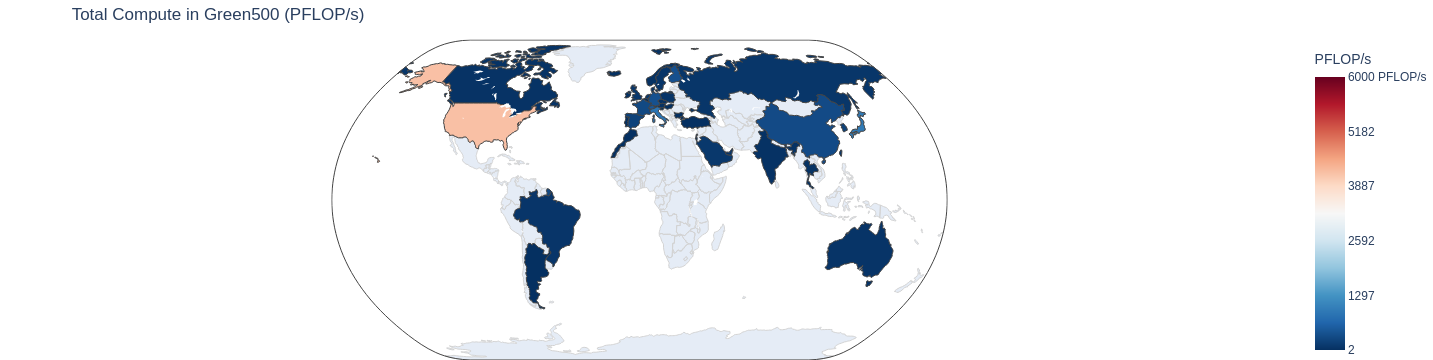

In [14]:
import pandas as pd
import numpy as np
import plotly.express as px

# Load and prepare data exactly as you do
df = pd.read_excel('../data/ch10_TOP500_202411.xlsx')
df = df[['Country','Rmax [TFlop/s]']].copy()
df['Count'] = 1
df['Rmax [TFlop/s]'] /= 1000  # now PFLOP/s

# Your normalization of US naming
df.loc[df.Country == 'United States', 'Country'] = 'United States of America'

# Aggregate
df = df.groupby('Country', as_index=False).sum()

# Preserve your vmax-based tweak for the US
vmin = df['Rmax [TFlop/s]'].min()
vmax = df['Rmax [TFlop/s]'].max()
df.loc[df.Country == 'United States of America', 'Rmax [TFlop/s]'] = vmax * 0.65

# Plotly wants standard country names. Map a few common mismatches.
name_fix = {
    'United States of America': 'United States',
    'Russia': 'Russian Federation',
    'South Korea': 'Korea, Republic of',
    'North Korea': "Korea, Democratic People's Republic of",
    'Czechia': 'Czech Republic',
    'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    'Congo (Brazzaville)': 'Congo',
    'Taiwan': 'Taiwan',
    'Vietnam': 'Viet Nam',
    'Syria': 'Syrian Arab Republic',
    'Moldova': 'Moldova, Republic of',
    'Tanzania': 'Tanzania, United Republic of',
}
df['Country_plotly'] = df['Country'].replace(name_fix)

# Build colorbar ticks and labels, with the top relabeled
tickvals = np.linspace(vmin, vmax, 6)
ticktext = [f"{int(t)}" for t in tickvals[:-1]] + ['6000 PFLOP/s']

fig = px.choropleth(
    df,
    locations='Country_plotly',
    locationmode='country names',
    color='Rmax [TFlop/s]',
    hover_name='Country',
    color_continuous_scale='RdBu_r',  # close in spirit to matplotlib's coolwarm
    range_color=(vmin, vmax),
)

fig.update_layout(
    title='Total Compute in Green500 (PFLOP/s)',
    coloraxis_colorbar=dict(
        title='PFLOP/s',
        tickvals=tickvals,
        ticktext=ticktext
    ),
    margin=dict(l=0, r=0, t=40, b=0)
)

fig.update_geos(
    projection_type='natural earth',
    showcountries=True,
    countrycolor='lightgray',
    showcoastlines=False,
    showland=True
)

fig.show()
